In [441]:
import bs4
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import requests
import math
from textblob import TextBlob
from wordcloud import WordCloud, STOPWORDS

    to fetch all the comments we will need to iterate through multiple pages of comments and to do this lets find the total number of pages

In [259]:
url = "https://www.amazon.in/Apple-iPhone-XR-64GB-Black/product-reviews/B07JWV47JW/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews"


page = requests.get(url)
print(page.status_code)
html = page.content

soup = bs4.BeautifulSoup(html, 'html.parser')
num = soup.find_all('span', {'data-hook':"cr-filter-info-review-count"})
total = str(num[0].text)
t = total[-9::-1].split()
tt = t[0]
tt = "".join(reversed(tt))
tt = tt.replace(",", '')
tt = math.ceil(int(tt)/10)
tt

200


670

    Now fetching the name of the person who reviewed the product, star rating given by that person, comment title and the comment and storing them in lists so that they can further be used for our analysis

In [300]:
r_name

['A',
 'Sameer Patil',
 'Sameer Patil',
 'Amazon Customer',
 'A',
 'Shubham Dutta',
 'Nepuni Lokho',
 'Anand S Prasad',
 'Srikanth Jatla',
 'KAILASH C.',
 'LDM',
 'Amazon Customer',
 'A',
 'Sameer Patil',
 'Ankur Arora ',
 'Ayush Kumar Singh',
 'Meher k.',
 'Nitesh',
 'Neel',
 'Mondal',
 'Manohar Mali',
 'Harshal',
 'Alfred',
 'Aniruddha Ghosh',
 'A',
 'Sameer Patil',
 'Amazon Customer',
 'yaswanth kumar',
 'Amazon Customer',
 'Rituparno Das',
 'Dinesh',
 'AMIT SINGHA ROY',
 'Prince kumar',
 'Suraag',
 'Kusan Majumder',
 'Sushil Nagpal',
 'A',
 'Sameer Patil',
 'Vyver',
 'Santanu Biswas',
 'H S.',
 'varun',
 'Ratnesh',
 'mike',
 'Bharat Oberoi',
 'Amazon Customer',
 'Arun Stambhampelli',
 'Karthik S',
 'A',
 'Sameer Patil',
 'Awinash Goswami',
 'Pooja P.',
 'Pratik',
 'Sobin Thomas',
 'mit z',
 'S. Chandrasekaran',
 'anurag raghuvanshi',
 'Sachin Singh',
 'wangkhem yuhen singh',
 'rajeev kumar',
 'A',
 'Sameer Patil',
 'RAO ANAND',
 'JYO',
 'Adil Arfi',
 'Vishal',
 'Its me!',
 'Spitzer

    as we can see from the above example, we have some duplicacies in data which are caused due to the speific structure of that web page.
    
    Let's remove these duplication and make to make our analysis better and more refined.
    
    Since there can be fare chance that 2 person might have same first name, hence we will first put this data in a pandas dataframe and then remove duplicates in form of pairs assuming that 2 persons with same first and lastname might not have given exact same rating. 

In [308]:
r_starrate = []
for i in r_star:
    r = str(i)
    r_starrate.append(r[2]) 

In [310]:
df = pd.DataFrame()

In [311]:
df['Author'] = r_name
df['Rating'] = r_starrate

In [312]:
df

,Author,Rating
0,A,5
1,Sameer Patil,3
2,Sameer Patil,3
3,Amazon Customer,1
4,A,5
5,Shubham Dutta,1
6,Nepuni Lokho,5
7,Anand S Prasad,1
8,Srikanth Jatla,5
9,KAILASH C.,1


In [323]:
df.drop_duplicates(inplace = True)

In [325]:
df.to_csv('ratings.csv', index = False)

<Figure size 2400x1500 with 0 Axes>

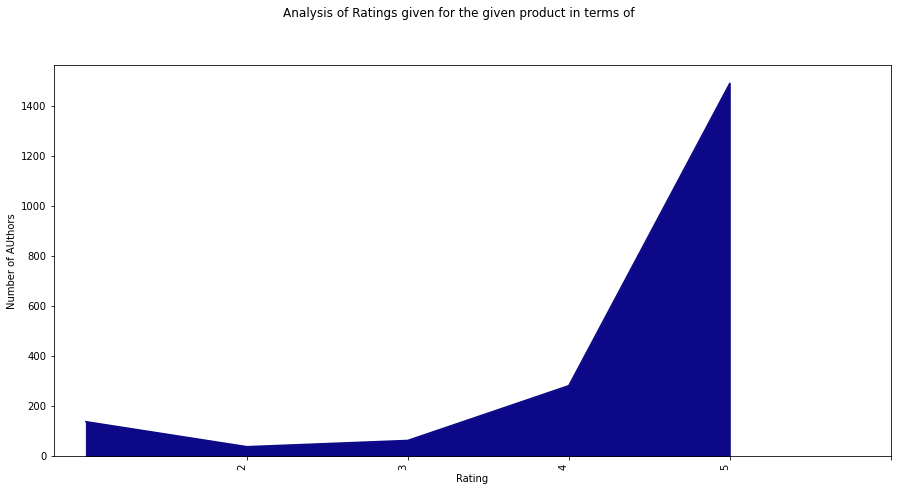

In [397]:
#df.groupby("Rating").count().plot(kind = 'bar')
dd = df.groupby("Rating").count()
dd.plot(kind = 'area', subplots = True, figsize = (15, 8), title = "Analysis of Ratings given for the given product in terms of", legend = False, xticks = [1, 2,3, 4, 5], rot = (0, 0), colormap = 'plasma')
plt.xlabel("Rating")
plt.xticks(rotation = 90)
plt.ylabel("Number of AUthors")
plt.show()

    
    
   This area plot clearly depicts that `maximum` users have given a `5 star` rating for this product and tells a lot about overall impression of this product on users

In [274]:
dff = pd.DataFrame()
dff['Comment_Title'] = r_title
dff['Review'] = r_body

In [275]:
dff

,Comment_Title,Review
0,"Which iPhone you should Purchase ? iPhone 8, X...",NOTE:@ This is detailed comparison between iPh...
1,Don't buy iPhone xr from Amazon.,Very bad experience with this iPhone xr phone....
2,Happy with the purchase,Amazing phone with amazing camera coming from ...
3,Amazon is not an apple authorised reseller. Pl...,So I got the iPhone XR just today. The product...
4,Excellent Battery life and buttery smooth UI,I've been an android user all my life until I ...
5,Never purchase a phone online.,I was delivered a phone that did not work imme...
6,Awesome iPhone,It has been a month since I started using my i...
7,Exchange of I phone xr with xs.,The phone is hanging. Video quality is not ver...
8,Worth upgrading from the 6S? I'll know in a fe...,I'll use this review to mostly say what I'm no...
9,Def a bad experience,Went with the iPhone XR after over a month of ...


In [398]:
dff.drop_duplicates(inplace = True)

In [399]:
dff.to_csv("reviews.csv", index = False)

In [400]:
from wordcloud import WordCloud, STOPWORDS

In [402]:
com = pd.read_csv("reviews.csv")


pandas.core.frame.DataFrame

In [404]:
co = com['Comment_Title']

In [405]:
co

0       Which iPhone you should Purchase ? iPhone 8, X...
1                        Don't buy iPhone xr from Amazon.
2                                 Happy with the purchase
3       Amazon is not an apple authorised reseller. Pl...
4            Excellent Battery life and buttery smooth UI
5                          Never purchase a phone online.
6                                          Awesome iPhone
7                         Exchange of I phone xr with xs.
8       Worth upgrading from the 6S? I'll know in a fe...
9                                    Def a bad experience
10                               Fake handsetset received
11      got at ₹49,900 but do i wasted my 50k?? ABSOLU...
12                       Pathetic Apple and IPhone Review
13                           Disappointment for an iPhone
14             Go for XR if you confused between X and XR
15                                  Problem with Dual SIM
16                                             Nice Phone
17            

In [407]:
st = co.to_string(index = False, header = None)

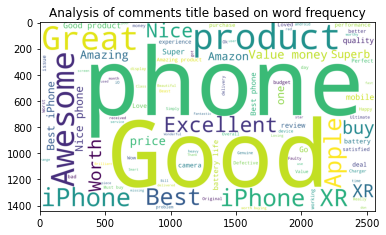

In [419]:
stop = set(STOPWORDS)
wc = WordCloud(width = 2560, height = 1440, stopwords = stop, min_font_size = 10, max_words = 100, background_color='white').generate(st)
wc.to_file('wc.png')
plt.title("Analysis of comments title based on word frequency")
plt.imshow(wc)
plt.show()

    This shows that people usually believe that this product is good, excellent, Awesome, best, fantastic, nice product, etc and tells us that people are usually have with this product.

In [420]:
c = com['Review']

In [433]:
c

0       NOTE:@ This is detailed comparison between iPh...
1       Very bad experience with this iPhone xr phone....
2       Amazing phone with amazing camera coming from ...
3       So I got the iPhone XR just today. The product...
4       I've been an android user all my life until I ...
5       I was delivered a phone that did not work imme...
6       It has been a month since I started using my i...
7       The phone is hanging. Video quality is not ver...
8       I'll use this review to mostly say what I'm no...
9       Went with the iPhone XR after over a month of ...
10      Im facing some speaker related issues and had ...
11      there are two angles from which smartphones ar...
12      I had taken the phone but the phones holds too...
13      This is a product which lets down the whole hi...
14      All in all an amazing product yet again from A...
15      iPhone XR is excellent there is no doubt about...
16      Using around a week now. It’s snappy fast. Pow...
17      Smooth

In [434]:
s = c.to_string(index = False, header = None)

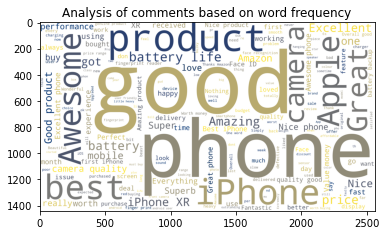

In [435]:
stop = set(STOPWORDS)
wc = WordCloud(width = 2560, height = 1440, stopwords = stop, min_font_size = 10, max_words = 200, background_color='white', colormap='cividis').generate(s)
wc.to_file('comment.png')
plt.title("Analysis of comments based on word frequency")
plt.imshow(wc)
plt.show()

    Here we can see that this is much similar to that of the review title but few more things are added here. Here people also prefer to talk about some of its features like battery life, camera quality, fingerprint, display, face id, charging , etc.

## Sentimental Analysis

In [437]:
sent = TextBlob(s)
print(sent.sentiment)

Sentiment(polarity=0.5355088507817012, subjectivity=0.6496345431093846)


    Where subjectivity --> personal feelings, views, or beliefs.
                                (+0.0 => +1.0)
                                If subjectivity is near 1 it means that comment is more of a persoanal belief than a factual information
                                
              polarity --> emotions expressed in a sentence.
                              It tells if a comment is positive, negetive or neutral
                              (-1.0 => +1.0)

here it tells that overall comments live from `neutral to positive` for this product and is more based on `personal beliefs`

In [440]:
sent = TextBlob(st)
print(sent.sentiment)

Sentiment(polarity=0.5839285570312944, subjectivity=0.6794463253675996)


now for sentiments in title part , titles are comparatively `more positive` for the comments and have `personal feelings`

### Dependencies

1. Execution time of this code highly depends on the number of reviews on that product and is directly propotional to it.

2. Mutiple Requests/Hits on Amazon may result in 503 or Server Unavailable error many times may be due to some security protocols followed by amazon

3. Disabling keepalive or deleting response object can be a good practise in this scenerio.

### Future Scope

1.    As this is only the backend focus project hence more work can be done on making a UI for this.

2. This project can be made more user friendly and dynamic by allowing user to enter product name from their end.